In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mp
import matplotlib.pyplot as plt

from pandas import read_csv

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
#reading the csv file
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
#checking the features
boston['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [4]:
#performing basic functions
print(max(boston['MEDV']))
print(min(boston['MEDV']))

50.0
5.0


In [5]:
#describing the data
boston.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


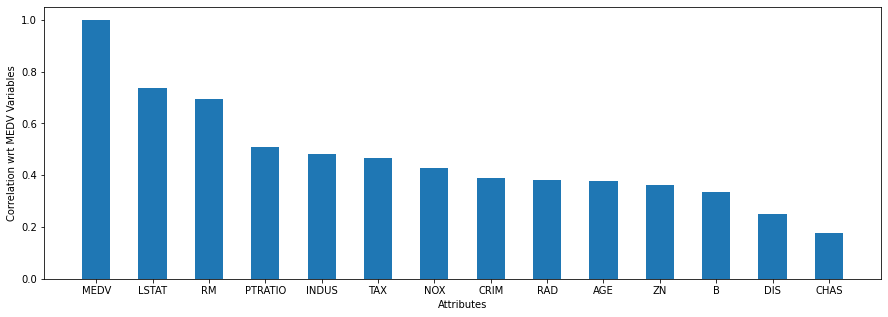

In [6]:
#correlation between every column in the data
#using PEARSON CORRELATION
corr = boston.corr('pearson')

#absolute value of the correlation
corrs = [abs(corr[attr]['MEDV']) for attr in list(boston)]

#make a list of pair [(corr, feature)] using zip
l = list(zip(corrs, list(boston)))

#sorting the list pairs in reverse
#with the correlation value as the key for sorting
l.sort(key = lambda x : x[0], reverse=True)

#'UNZIP' pairs to 2 lists
#zip(*l) makes a list looking like ([a,b,c], [d,e,f], [g,h,i]) to ([a,d,g], [b,e,h], [c,f,i])
corrs, labels = list(zip((*l)))

#plot correlation wrt MEDV variables as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation wrt MEDV Variables')
plt.xticks(index, labels)
plt.show()

In [7]:
#setting the values
X=boston['LSTAT'].values
Y=boston['MEDV'].values

In [8]:
#before normalisation
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [9]:
#normalising
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1))
X = X[:, -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:, -1]

In [10]:
#after normalisation
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [11]:
#Mean Squared Error
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return e * 1/(2 * N)

In [12]:
#0.2 indicates that 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [13]:
#update Function
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

In [14]:
#Gradient Descent Function
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping Gradient Descent.')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [15]:
%%time   
#time taken for computing the given number of iterations

init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001


m, c, error_value, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

CPU times: user 122 ms, sys: 1.04 ms, total: 123 ms
Wall time: 122 ms


In [16]:
#as the number of iterations increase, the changes in the line is less noticeable
#in order to reduce the processing time for the animation, it is advised to choose smaller values
mc_values_anim = mc_values[0:250:5]

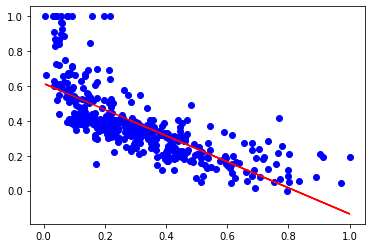

In [17]:
#plotting a scatter plot of train dataset
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, ((m * xtrain) + c), color='r')

Text(0, 0.5, 'Error')

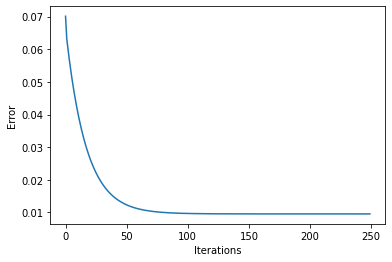

In [18]:
#plot of Error vs Iteration Curve
plt.plot(np.arange(len(error_value)), error_value)
plt.xlabel('Iterations')
plt.ylabel('Error')

In [19]:
#calculating the prediction on the tset set as vectorized operation
predicted = (m * xtest) + c

In [20]:
#calculating MSE for the predicted values on the test dataset
mean_squared_error(ytest, predicted)

0.018803425827711186

In [21]:
#putting xtest, ytest and predicted values into a single data frame so that we can see the 
#predicted values alongside the testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns =['X', 'Target Y', 'Predicted Y'])
p.head()

,X,Target Y,Predicted Y
0,0.099338,0.693333,0.539904
1,0.328918,0.348889,0.368212
2,0.540563,0.313333,0.209933
3,0.540563,0.184444,0.209933
4,0.064845,0.628889,0.565700


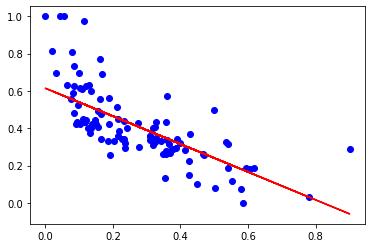

In [22]:
#plotting a scatter plot of test dataset wrt predicted values
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

In [23]:
#reshape to change the shape that is required by the scaler
predicted = predicted.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)


#this is to remove extra dimensions

xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns =['X', 'Target Y', 'Predicted Y'])
p.round(decimals = 2)
p.head()

,X,Target Y,Predicted Y
0,5.33,36.2,29.295699
1,13.65,20.7,21.569546
2,21.32,19.1,14.447000
3,21.32,13.3,14.447000
4,4.08,33.3,30.456479
